#LAB 1 DOIKOV VADYM
#VARIANT 12

In [1]:
#imports
import numpy as np
from PIL import Image, ImageOps
from matplotlib import pyplot as plt


In [2]:
def get_image(img_path):
    return np.array(ImageOps.grayscale(Image.open(img_path)))

In [3]:
def show_img(img, title):
    dpi = 80
    width, height = img.shape
    figsize = width / float(dpi), height / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image
    
    ax.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()



happy_jack.png


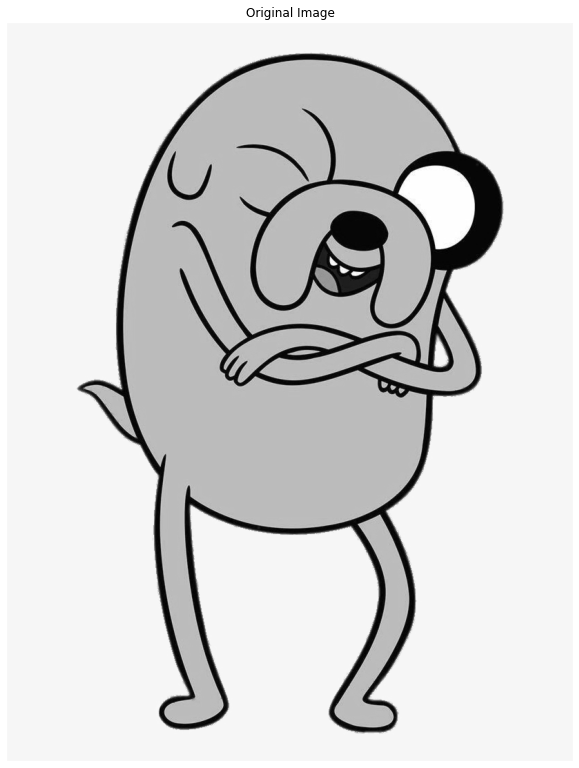

monarch_in_may.jpg


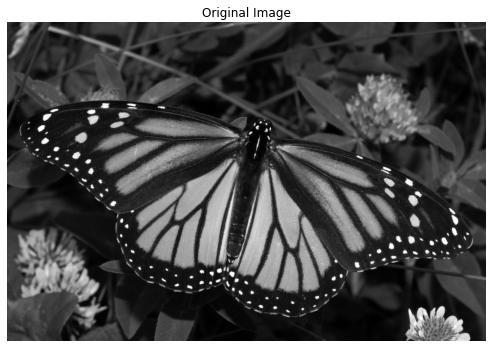

low_contrast.png


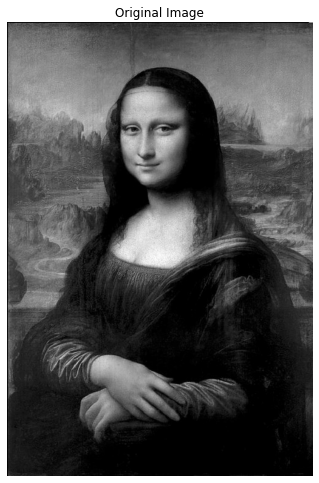

hight_contrast.png


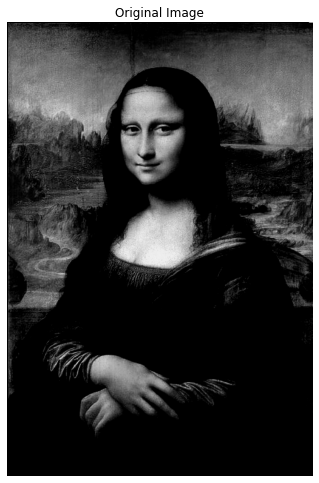

In [4]:
img_paths =['images/happy_jack.png', 'images/monarch_in_may.jpg', 
            'images/low_contrast.png', 'images/hight_contrast.png']
images = []
file_names = []
for i, path in enumerate(img_paths):
    file_names.append(path.rsplit('/')[1])
    print(file_names[i])
    img = get_image(path)
    images.append(img)
    show_img(img, 'Original Image')


In [5]:
kernel_Sobel_x = np.array([
[-1, 0, 1],
[-2, 0, 2],
[-1, 0, 1]])

kernel_Sobel_y = np.array([
[1, 2, 1],
[0, 0, 0],
[-1, -2, -1]])

In [6]:
for i,img in enumerate(images):
    print(f'Image {i+1} shape - {img.shape}')

Image 1 shape - (1070, 820)
Image 2 shape - (532, 800)
Image 3 shape - (749, 504)
Image 4 shape - (749, 504)


In [7]:
def convolve(image, kernel, title):

    imageH, imageW = image.shape
    kernelH, kernelW = kernel.shape

    padding = kernel.shape[0] - 1
    h, w = imageH - 2 * kernelH + 2 * padding, imageW - 2 * kernelW + 2 * padding
    padded_img = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
    padded_img[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
    
    output = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            output[i, j] = np.sum(image[i:i+kernelH, j:j+kernelW] * kernel)
    show_img(output, title)

In [16]:
print(images[0].dtype)

uint8


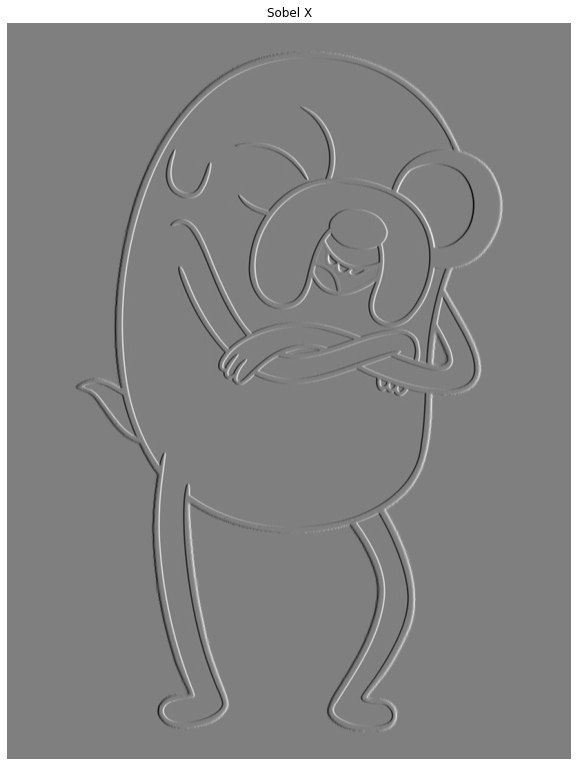

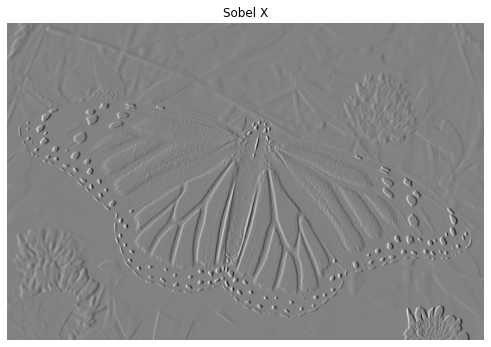

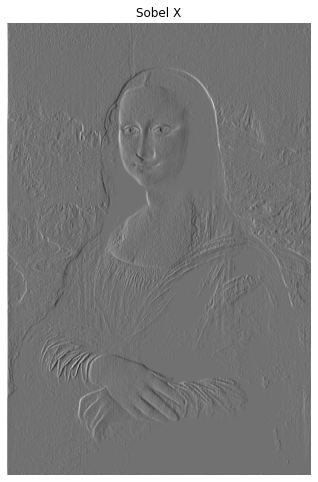

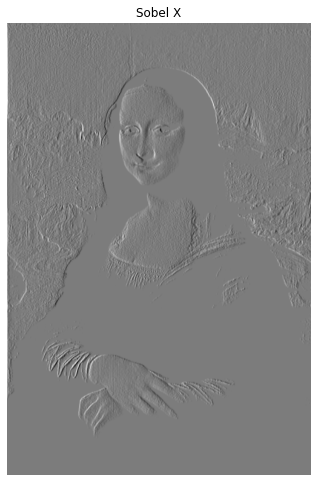

In [8]:
for i, img in enumerate(images):
    convolve(img, kernel_Sobel_x, 'Sobel X')

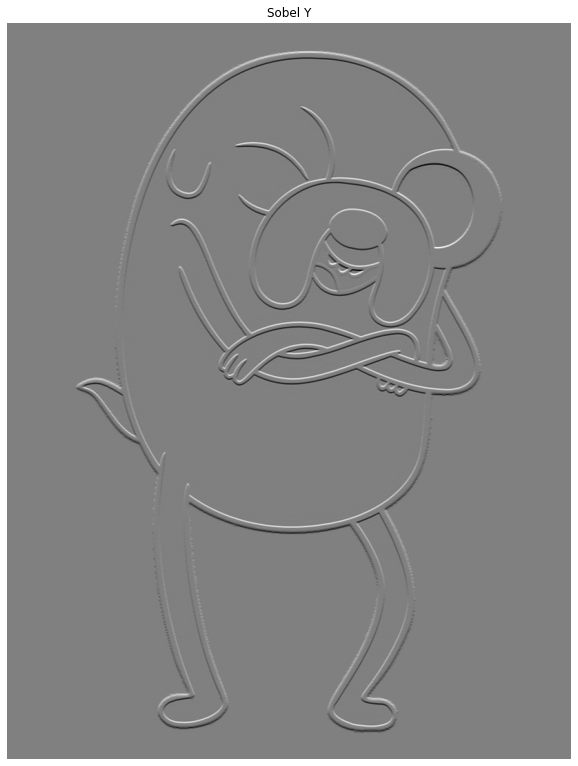

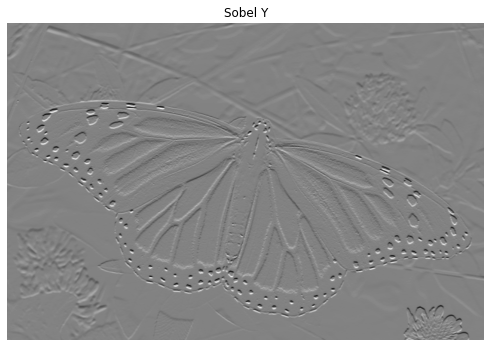

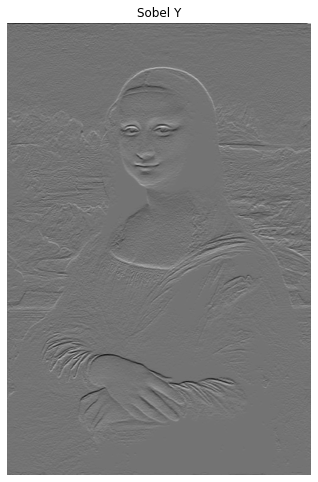

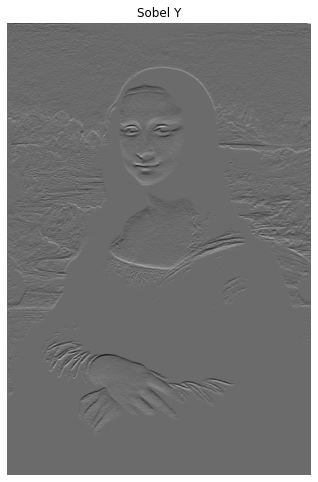

In [9]:
for img in images:
    convolve(img, kernel_Sobel_y, 'Sobel Y')

In [10]:
kernel_Robert_x = np.array([
[1, 0],
[0, -1]])

kernel_Robert_y = np.array([
[0, 1],
[-1, 0]])


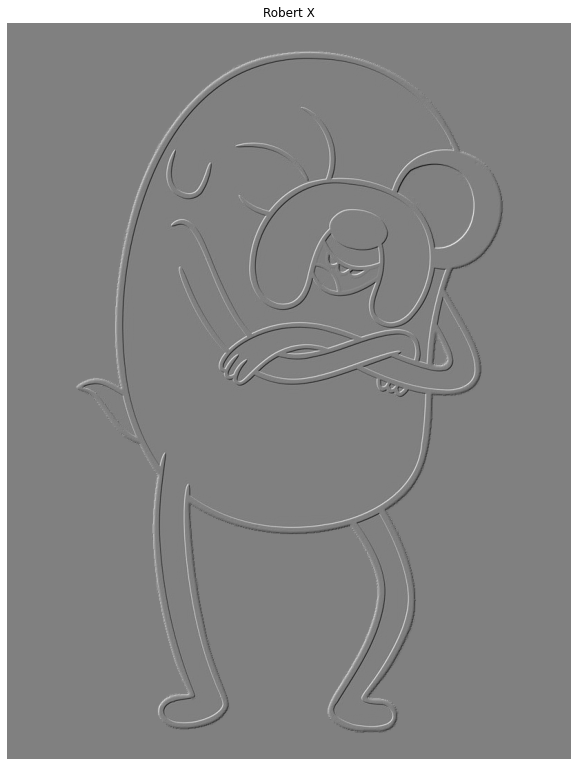

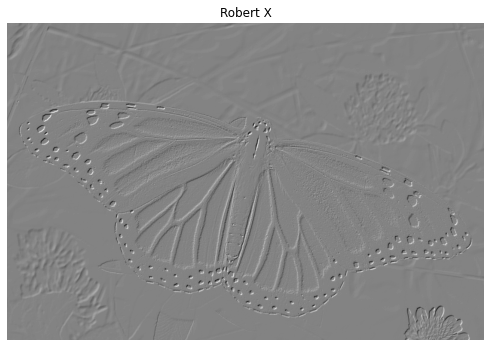

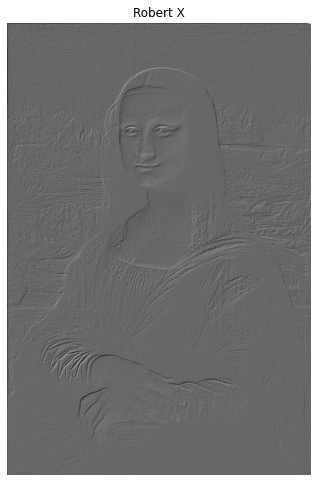

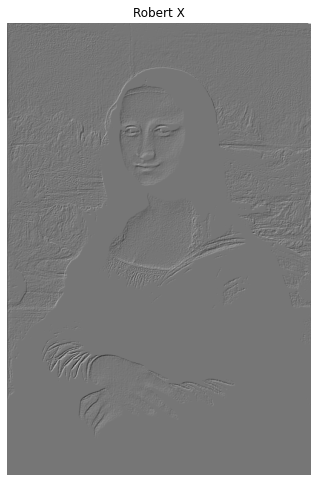

In [11]:
for img in images:
    convolve(img, kernel_Robert_x, 'Robert X')

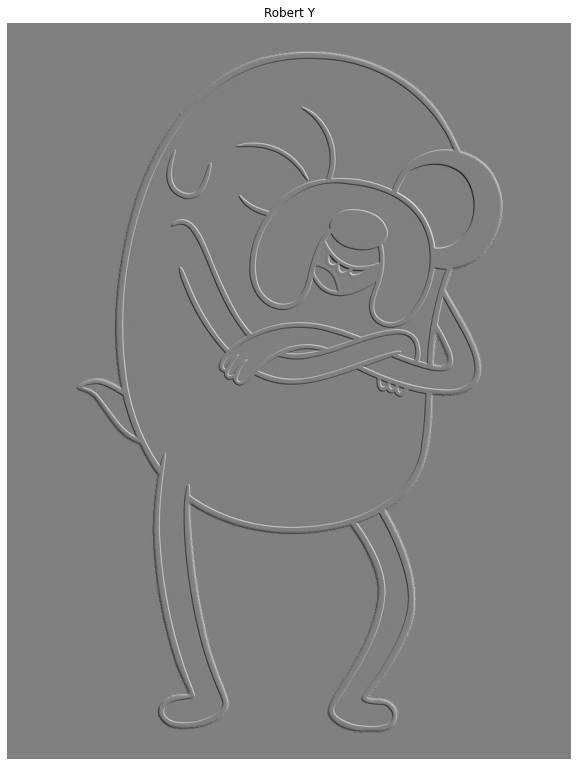

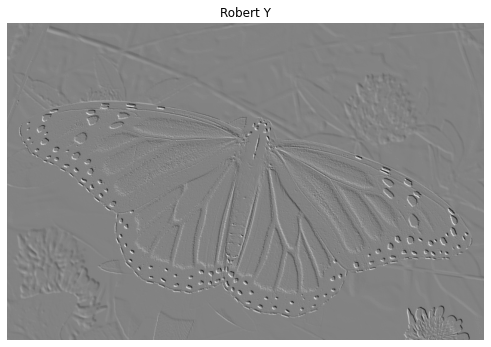

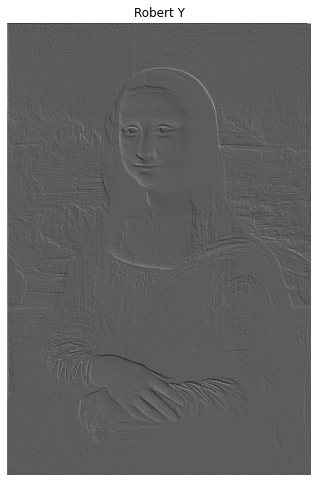

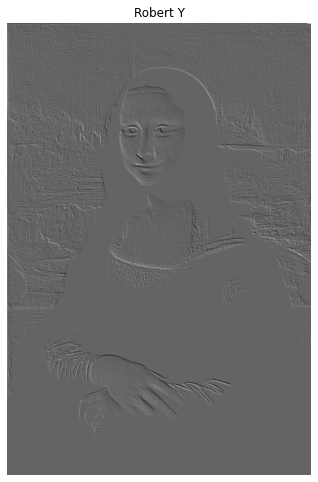

In [12]:
for img in images:
    convolve(img, kernel_Robert_y, 'Robert Y')